In [8]:
import pandas as pd
import numpy as np
from spacepy import pycdf
file2 = '/home/fedor/Documents/HSE/Projects/Data/Data_Retrieve/T_a/tha_l2_mom_20190422_v01.cdf'
file1 = '/home/fedor/Documents/HSE/Projects/Data/Data_Retrieve/T_a/tha_l2_fgm_20190422_v01.cdf'
enteredl = 0
enteredlr = 400
cdf = pycdf.CDF(file2)
# print(cdf)

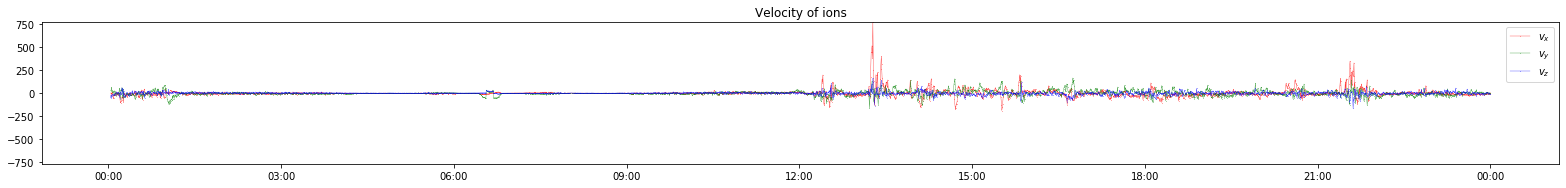

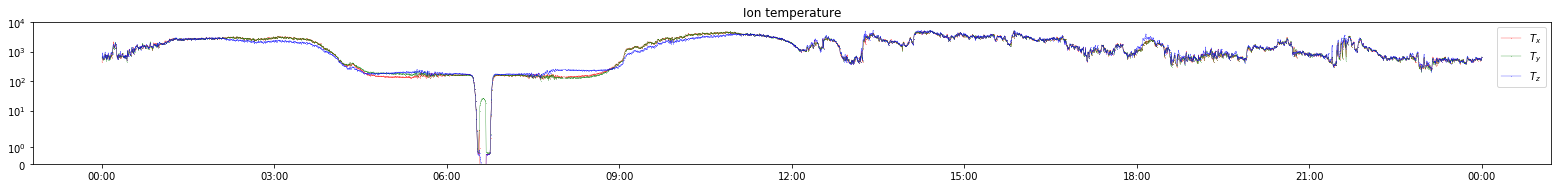

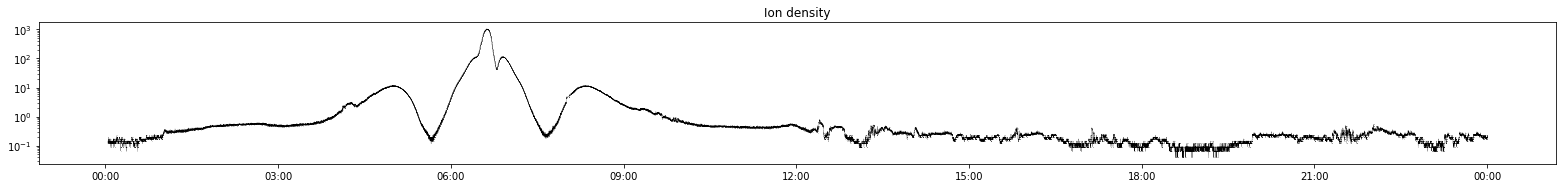

In [9]:
import matplotlib.pyplot as plt
import datetime

# ***************************************************************************
# Plotting velocity
# ***************************************************************************

time = []
vx = []
vy = []
vz = []

limit = -10

for i in range(0,len(cdf['tha_peim_velocity_gsm']),10):
    velocity = cdf['tha_peim_velocity_gsm'][i]
    if (velocity[0] and velocity[1] and velocity[2]) is not np.nan:
        vx.append(velocity[0])
        vy.append(velocity[1])
        vz.append(velocity[2])
        limit2 = max(abs(cdf['tha_peim_velocity_gsm'][i]))
        if limit < limit2:
            limit = limit2
    else:
        vx.append(0)
        vy.append(0)
        vz.append(0)
    time.append(cdf['tha_peim_time'][i])
    
# plt.figure(figsize=(14, 7))
fig, ax = plt.subplots(figsize=(27.2, 2.6))


datess = []
for i in range(0,len(cdf['tha_peim_time']),10):
    time = cdf['tha_peim_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

begTime = cdf['tha_peim_time'][0]
endTime = cdf['tha_peim_time'][-1]

ax.plot_date(dates, vx, color='red', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, vy, color='green', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, vz, color='blue', ls='-', linewidth=0.3,mew=0.3,ms=0.3)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

plt.title("Velocity of ions")
label_list = [r'$v_x$',r'$v_y$',r'$v_z$']
plt.legend(label_list)
if enteredl == 0:
    ax.set_ylim(-limit, limit)
else:
    ax.set_ylim(enteredl, enteredlr)
    
plt.show()

# ***************************************************************************
# Plotting temperature
# ***************************************************************************

time = []
tx = []
ty = []
tz = []

for i in range(0,len(cdf['tha_peim_t3_mag']),10):
    temp = cdf['tha_peim_t3_mag'][i]
    if (temp[0] and temp[1] and temp[2]) is not np.nan:
        tx.append(temp[0])
        ty.append(temp[1])
        tz.append(temp[2])
    else:
        tx.append(0)
        ty.append(0)
        tz.append(0)
    time.append(cdf['tha_peim_time'][i])
    
fig, ax = plt.subplots(figsize=(27.2, 2.6))


datess = []
for i in range(0,len(cdf['tha_peim_time']),10):
    time = cdf['tha_peim_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

ax.plot_date(dates, tx, color='red', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, ty, color='green', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, tz, color='blue', ls='-', linewidth=0.3,mew=0.3,ms=0.3)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))


label_list = [r'$T_x$',r'$T_y$',r'$T_z$']
plt.title("Ion temperature")
plt.legend(label_list)
ax.set_ylim(0, 10**4)
plt.yscale('symlog')
plt.show()

# ***************************************************************************
# Plotting density
# ***************************************************************************

time = []
d = []

for i in range(len(cdf['tha_peim_density'])):
    density = cdf['tha_peim_density'][i]
    if density is not np.nan:
        d.append(density)
    else:
        d.append(0)
    time.append(cdf['tha_peim_time'][i])
    
fig, ax = plt.subplots(figsize=(27.2, 2.6))


datess = []
for i in range(len(cdf['tha_peim_time'])):
    time = cdf['tha_peim_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)


ax.plot_date(dates, d, color='black', ls='-', linewidth=0.2,mew=0.2,ms=0.2)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

plt.title("Ion density")
plt.yscale('log')
plt.show()

In [10]:
cdf.close()

In [13]:
import pandas as pd
import numpy as np
from spacepy import pycdf
import datetime
cdf = pycdf.CDF(file1)
# print(cdf)

In [14]:
datess = []
for i in range(len(cdf['tha_fgs_time'])):
    time = cdf['tha_fgs_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

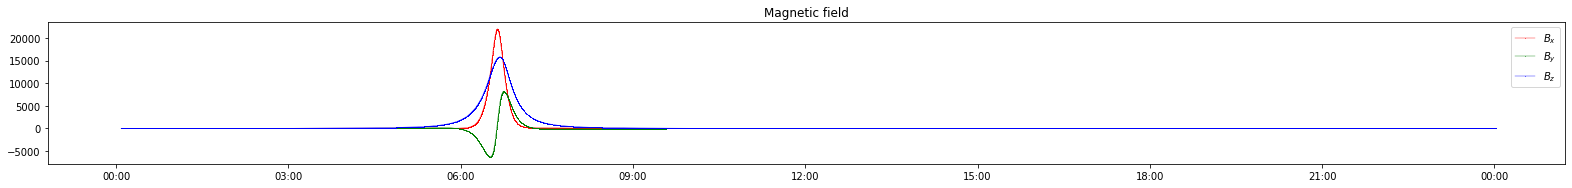

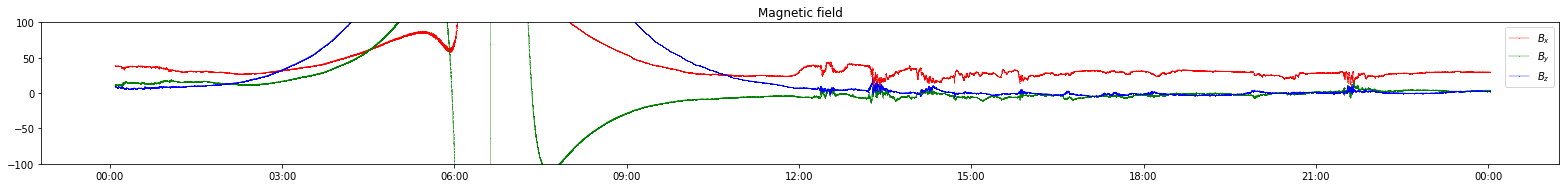

In [15]:
import datetime
import matplotlib


# ***************************************************************************
# Plotting normal magnetic field
# ***************************************************************************

time = []
bx = []
by = []
bz = []

toformat = []

toformat = [0,0]
toformattime = [begTime, endTime]

datess = []
for i in range(2):
    sometime = toformattime[i]
    datess.append(datetime.datetime.utcfromtimestamp(sometime))

dates2 = matplotlib.dates.date2num(datess)


for i in range(len(cdf['tha_fgs_gsm'])):
    field = cdf['tha_fgs_gsm'][i]
    if (field[0] and field[1] and field[2]) is not np.nan:
        bx.append(field[0])
        by.append(field[1])
        bz.append(field[2])
    else:
        bx.append(0)
        by.append(0)
        bz.append(0)
    time.append(cdf['tha_fgs_time'][i])
    
    
fig, ax = plt.subplots(figsize=(27.2, 2.6))

import datetime

datess = []
for i in range(len(cdf['tha_fgs_time'])):
    time = cdf['tha_fgs_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

ax.plot_date(dates, bx, color='red', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, by, color='green', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, bz, color='blue',  ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates2, toformat, color='blue', ls='-', lw=0.4,mew=0.4,ms=0.4,visible=False)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

label_list = [r'$B_x$',r'$B_y$',r'$B_z$']

plt.title("Magnetic field")
plt.legend(label_list)

plt.show()



# ***************************************************************************
# Plotting not normal magnetic field
# ***************************************************************************

fig, ax = plt.subplots(figsize=(27.2, 2.6))

ax.plot_date(dates, bx, color='red', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, by, color='green', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, bz, color='blue',  ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates2, toformat, color='blue', ls='-', lw=0.4,mew=0.4,ms=0.4,visible=False)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

label_list = [r'$B_x$',r'$B_y$',r'$B_z$']

plt.title("Magnetic field")
plt.legend(label_list)

ax.set_ylim(-100, 100)
plt.show()

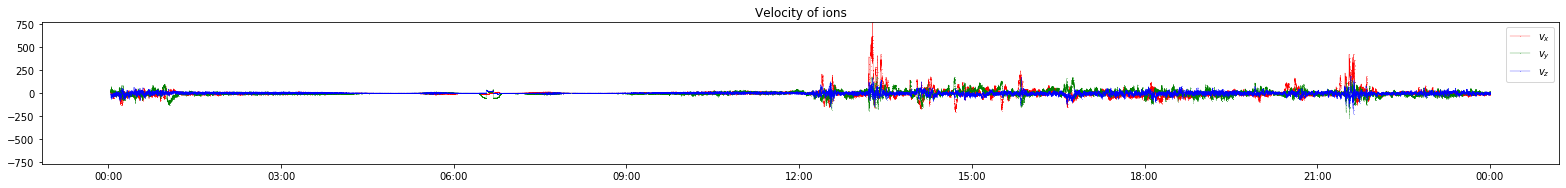

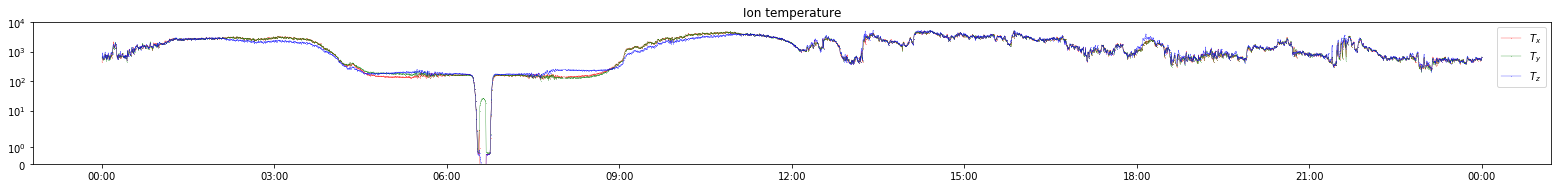

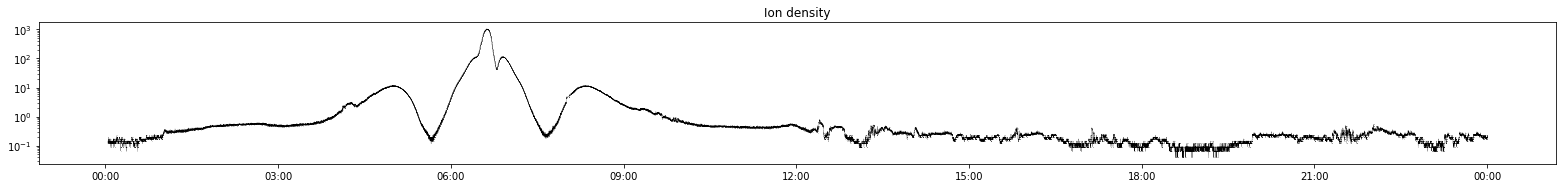

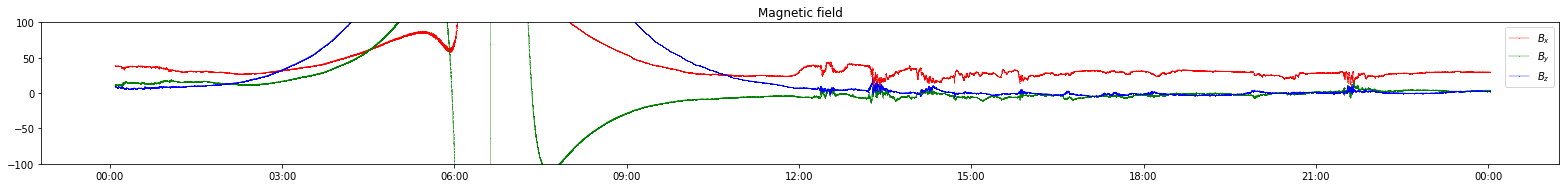

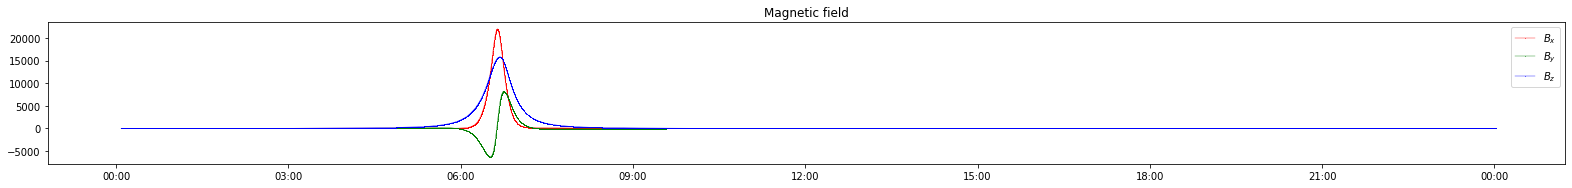

In [18]:
# ***************************************************************************
# Plotting all graphs in this section, just all code above
# ***************************************************************************

import pandas as pd
import numpy as np
from spacepy import pycdf
cdf = pycdf.CDF(file2)

import matplotlib.pyplot as plt
import datetime

# ***************************************************************************
# Plotting velocity
# ***************************************************************************

time = []
vx = []
vy = []
vz = []

limit = -10

for i in range(0,len(cdf['tha_peim_velocity_gsm'])):
    velocity = cdf['tha_peim_velocity_gsm'][i]
    if (velocity[0] and velocity[1] and velocity[2]) is not np.nan:
        vx.append(velocity[0])
        vy.append(velocity[1])
        vz.append(velocity[2])
        limit2 = max(abs(cdf['tha_peim_velocity_gsm'][i]))
        if limit < limit2:
            limit = limit2
    else:
        vx.append(0)
        vy.append(0)
        vz.append(0)
    time.append(cdf['tha_peim_time'][i])
    
# plt.figure(figsize=(14, 7))
fig, ax = plt.subplots(figsize=(27.2, 2.6))


datess = []
for i in range(0,len(cdf['tha_peim_time'])):
    time = cdf['tha_peim_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

begTime = cdf['tha_peim_time'][0]
endTime = cdf['tha_peim_time'][-1]

ax.plot_date(dates, vx, color='red', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, vy, color='green', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, vz, color='blue', ls='-', linewidth=0.3,mew=0.3,ms=0.3)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

plt.title("Velocity of ions")
label_list = [r'$v_x$',r'$v_y$',r'$v_z$']
plt.legend(label_list)
if enteredl == 0:
    ax.set_ylim(-limit, limit)
else:
    ax.set_ylim(enteredl, enteredlr)
    
plt.show()

# ***************************************************************************
# Plotting temperature
# ***************************************************************************

time = []
tx = []
ty = []
tz = []

for i in range(0,len(cdf['tha_peim_t3_mag']),10):
    temp = cdf['tha_peim_t3_mag'][i]
    if (temp[0] and temp[1] and temp[2]) is not np.nan:
        tx.append(temp[0])
        ty.append(temp[1])
        tz.append(temp[2])
    else:
        tx.append(0)
        ty.append(0)
        tz.append(0)
    time.append(cdf['tha_peim_time'][i])
    
fig, ax = plt.subplots(figsize=(27.2, 2.6))


datess = []
for i in range(0,len(cdf['tha_peim_time']),10):
    time = cdf['tha_peim_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

ax.plot_date(dates, tx, color='red', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, ty, color='green', ls='-', linewidth=0.3,mew=0.3,ms=0.3)
ax.plot_date(dates, tz, color='blue', ls='-', linewidth=0.3,mew=0.3,ms=0.3)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))


label_list = [r'$T_x$',r'$T_y$',r'$T_z$']
plt.title("Ion temperature")
plt.legend(label_list)
ax.set_ylim(0, 10**4)
plt.yscale('symlog')
plt.show()

# ***************************************************************************
# Plotting density
# ***************************************************************************

time = []
d = []

for i in range(len(cdf['tha_peim_density'])):
    density = cdf['tha_peim_density'][i]
    if density is not np.nan:
        d.append(density)
    else:
        d.append(0)
    time.append(cdf['tha_peim_time'][i])
    
fig, ax = plt.subplots(figsize=(27.2, 2.6))


datess = []
for i in range(len(cdf['tha_peim_time'])):
    time = cdf['tha_peim_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)


ax.plot_date(dates, d, color='black', ls='-', linewidth=0.2,mew=0.2,ms=0.2)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

plt.title("Ion density")
plt.yscale('log')
plt.show()

cdf.close()

import pandas as pd
import numpy as np
from spacepy import pycdf
import datetime

cdf = pycdf.CDF(file1)

datess = []
for i in range(len(cdf['tha_fgs_time'])):
    time = cdf['tha_fgs_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

import datetime
import matplotlib


# ***************************************************************************
# Plotting not normal magnetic field
# ***************************************************************************

time = []
bx = []
by = []
bz = []

toformat = []

toformat = [0,0]
toformattime = [begTime, endTime]

datess = []
for i in range(2):
    sometime = toformattime[i]
    datess.append(datetime.datetime.utcfromtimestamp(sometime))

dates2 = matplotlib.dates.date2num(datess)


for i in range(len(cdf['tha_fgs_gsm'])):
    field = cdf['tha_fgs_gsm'][i]
    if (field[0] and field[1] and field[2]) is not np.nan:
        bx.append(field[0])
        by.append(field[1])
        bz.append(field[2])
    else:
        bx.append(0)
        by.append(0)
        bz.append(0)
    time.append(cdf['tha_fgs_time'][i])
    
    
fig, ax = plt.subplots(figsize=(27.2, 2.6))

import datetime

datess = []
for i in range(len(cdf['tha_fgs_time'])):
    time = cdf['tha_fgs_time'][i]
    datess.append(datetime.datetime.utcfromtimestamp(time))
    
import matplotlib

dates = matplotlib.dates.date2num(datess)

ax.plot_date(dates, bx, color='red', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, by, color='green', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, bz, color='blue',  ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates2, toformat, color='blue', ls='-', lw=0.4,mew=0.4,ms=0.4,visible=False)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

label_list = [r'$B_x$',r'$B_y$',r'$B_z$']

ax.set_ylim(-100, 100)

plt.title("Magnetic field")
plt.legend(label_list)

plt.show()



# ***************************************************************************
# Plotting normal magnetic field
# ***************************************************************************

fig, ax = plt.subplots(figsize=(27.2, 2.6))

ax.plot_date(dates, bx, color='red', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, by, color='green', ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates, bz, color='blue',  ls='-', lw=0.4,mew=0.4,ms=0.4)
ax.plot_date(dates2, toformat, color='blue', ls='-', lw=0.4,mew=0.4,ms=0.4,visible=False)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

label_list = [r'$B_x$',r'$B_y$',r'$B_z$']

plt.title("Magnetic field")
plt.legend(label_list)

plt.show()